In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 15)

# pasajeros

In [65]:
#leer base de datos
flights = pd.read_csv('C:\\Users\\axelm\\OneDrive\\Documentos\\python\\datathon_2024\\Filghts TEC_Valid.csv')
flights

,Flight_ID,Aeronave,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers,Bookings
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0
2,6cfa1bbaa44f08fc7d3061f034a6a5ce,XA-VBV,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN,NaN
3,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0
4,d0987ee648eea254063bfe2b39571b67,XA-VAP,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...
245748,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0
245749,ef32da2731db80faa8b9f5030979a016,9H-MLV,AW,BT,Playa,Ciudad Principal,2024-04-20 10:45:00,2024-04-20 14:00:00,178,NaN,NaN
245750,9c8970e9836d9c5ef9415bfa93c3f408,XA-VAC,AT,BT,Playa,Ciudad Principal,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0,95.0
245751,3c15779202b13158f78e8a8afe377250,NaN,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:15:00,240,NaN,NaN


In [66]:
#revisar nan
flights.isna().sum()

Flight_ID                0
Aeronave             80390
DepartureStation         1
ArrivalStation           1
Destination_Type         1
Origin_Type              1
STD                      0
STA                      0
Capacity                 0
Passengers          123525
Bookings            123525
dtype: int64

In [67]:
#dropeamos id, aeronave y bookings, ya que no son columnas necesarias para realizar la predicción de passengers (bookings termina estando en función del resto de las columnas)
fdf = flights.drop(columns = ['Flight_ID', 'Aeronave', 'Bookings'])
fdf

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0
2,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN
3,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0
4,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0
...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0
245749,AW,BT,Playa,Ciudad Principal,2024-04-20 10:45:00,2024-04-20 14:00:00,178,NaN
245750,AT,BT,Playa,Ciudad Principal,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0
245751,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:15:00,240,NaN


In [68]:
#revisar nan en el nuevo df
fdf.isna().sum()

DepartureStation         1
ArrivalStation           1
Destination_Type         1
Origin_Type              1
STD                      0
STA                      0
Capacity                 0
Passengers          123525
dtype: int64

In [69]:
#revisar las filas con nan
fdf[fdf['DepartureStation'].isna()]

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers
173981,NaN,BA,Ciudad Principal,NaN,2023-10-22 20:15:00,2023-10-22 22:05:00,186,47.0


In [70]:
#revisar las filas con nan
fdf[fdf['ArrivalStation'].isna()]

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers
1876,BA,NaN,NaN,Ciudad Principal,2023-10-21 15:55:00,2023-10-21 17:30:00,186,42.0


In [71]:
#dropear los nan (2 filas, no son significantes)
fdf = fdf.dropna(subset = ['DepartureStation', 'ArrivalStation'])
fdf

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,STD,STA,Capacity,Passengers
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0
2,AW,AS,MX Amigos y Familia,Ciudad Principal,2024-02-16 17:10:00,2024-02-16 17:55:00,220,NaN
3,AW,AS,MX Amigos y Familia,Ciudad Principal,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0
4,BA,AB,Playa,Ciudad Principal,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0
...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0
245749,AW,BT,Playa,Ciudad Principal,2024-04-20 10:45:00,2024-04-20 14:00:00,178,NaN
245750,AT,BT,Playa,Ciudad Principal,2023-12-22 12:50:00,2023-12-22 16:10:00,180,163.0
245751,AW,BT,Playa,Ciudad Principal,2024-10-04 10:00:00,2024-10-04 13:15:00,240,NaN


In [72]:
#separamos las fechas en dos columnas: día y hora

fdf['STD'] = pd.to_datetime(fdf['STD'])
fdf['STA'] = pd.to_datetime(fdf['STA'])

fdf['Date_STD'] = fdf['STD'].dt.date
fdf['Time_STD'] = fdf['STD'].dt.time

fdf['Date_STA'] = fdf['STA'].dt.date
fdf['Time_STA'] = fdf['STA'].dt.time

fdf.drop(columns = ['STD', 'STA'], inplace = True)

fdf

C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\3731999054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['STD'] = pd.to_datetime(fdf['STD'])
C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\3731999054.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['STA'] = pd.to_datetime(fdf['STA'])
C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\3731999054.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,Capacity,Passengers,Date_STD,Time_STD,Date_STA,Time_STA
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,240,229.0,2023-10-19,11:40:00,2023-10-19,14:25:00
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,186,197.0,2023-07-03,00:55:00,2023-07-03,04:55:00
2,AW,AS,MX Amigos y Familia,Ciudad Principal,220,NaN,2024-02-16,17:10:00,2024-02-16,17:55:00
3,AW,AS,MX Amigos y Familia,Ciudad Principal,220,200.0,2023-06-26,15:15:00,2023-06-26,15:55:00
4,BA,AB,Playa,Ciudad Principal,186,162.0,2023-02-10,08:40:00,2023-02-10,09:50:00
...,...,...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,240,189.0,2023-12-29,07:30:00,2023-12-29,14:50:00
245749,AW,BT,Playa,Ciudad Principal,178,NaN,2024-04-20,10:45:00,2024-04-20,14:00:00
245750,AT,BT,Playa,Ciudad Principal,180,163.0,2023-12-22,12:50:00,2023-12-22,16:10:00
245751,AW,BT,Playa,Ciudad Principal,240,NaN,2024-10-04,10:00:00,2024-10-04,13:15:00


In [73]:
fdf['count'] = 1
fdf_date = fdf.groupby('Date_STD')['count'].sum().reset_index()

fdf_date

C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\3282614096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['count'] = 1


,Date_STD,count
0,2023-01-02,354
1,2023-01-03,338
2,2023-01-04,325
3,2023-01-05,322
4,2023-01-06,347
...,...,...
770,2025-02-16,1
771,2025-02-17,1
772,2025-02-20,2
773,2025-02-26,2


C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\2143591170.py:2: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  fdf_date = fdf_date[fdf_date['Date_STD'] < fecha]


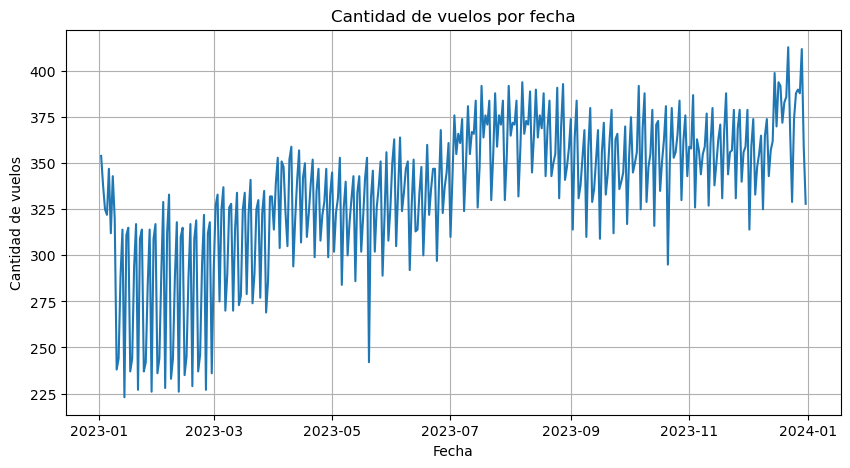

In [74]:
fecha = pd.to_datetime('2024-01-01')
fdf_date = fdf_date[fdf_date['Date_STD'] < fecha]

plt.figure(figsize=(10, 5))
sns.lineplot(x='Date_STD', y='count', data=fdf_date)
plt.title('Cantidad de vuelos por fecha')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de vuelos')
plt.grid(True)
plt.show()

In [75]:
#redondear horas hacia abajo
fdf['Time_STD'] = pd.to_datetime(fdf['Time_STD'], format='%H:%M:%S')
fdf['Time_STD'] = fdf['Time_STD'].dt.floor('H')
fdf['Time_STD'] = fdf['Time_STD'].dt.time

fdf['Time_STA'] = pd.to_datetime(fdf['Time_STA'], format='%H:%M:%S')
fdf['Time_STA'] = fdf['Time_STA'].dt.floor('H')
fdf['Time_STA'] = fdf['Time_STA'].dt.time

fdf

C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\1377037936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Time_STD'] = pd.to_datetime(fdf['Time_STD'], format='%H:%M:%S')
C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\1377037936.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Time_STD'] = fdf['Time_STD'].dt.floor('H')
C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\1377037936.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,Capacity,Passengers,Date_STD,Time_STD,Date_STA,Time_STA,count
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,240,229.0,2023-10-19,11:00:00,2023-10-19,14:00:00,1
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,186,197.0,2023-07-03,00:00:00,2023-07-03,04:00:00,1
2,AW,AS,MX Amigos y Familia,Ciudad Principal,220,NaN,2024-02-16,17:00:00,2024-02-16,17:00:00,1
3,AW,AS,MX Amigos y Familia,Ciudad Principal,220,200.0,2023-06-26,15:00:00,2023-06-26,15:00:00,1
4,BA,AB,Playa,Ciudad Principal,186,162.0,2023-02-10,08:00:00,2023-02-10,09:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,240,189.0,2023-12-29,07:00:00,2023-12-29,14:00:00,1
245749,AW,BT,Playa,Ciudad Principal,178,NaN,2024-04-20,10:00:00,2024-04-20,14:00:00,1
245750,AT,BT,Playa,Ciudad Principal,180,163.0,2023-12-22,12:00:00,2023-12-22,16:00:00,1
245751,AW,BT,Playa,Ciudad Principal,240,NaN,2024-10-04,10:00:00,2024-10-04,13:00:00,1


In [98]:
# Se determinó si es temporada alta con el calendario escolar de México
# Función para determinar si la fecha es temporada alta
def is_high_season(date):
    year = date.year
        #verano, asueto revolución, invierno, asueto constitución, asueto petróleo
    if (pd.Timestamp(year=year, month=7, day=17) <= date <= pd.Timestamp(year=year, month=8, day=27)) or \
       (pd.Timestamp(year=year, month=11, day=18) <= date <= pd.Timestamp(year=year, month=11, day=20)) or \
       (pd.Timestamp(year=year, month=12, day=18) <= date <= pd.Timestamp(year=year+1, month=1, day=5)) or \
       (pd.Timestamp(year=year, month=2, day=3) <= date <= pd.Timestamp(year=year, month=2, day=5)) or \
       (pd.Timestamp(year=year, month=3, day=16) <= date <= pd.Timestamp(year=year, month=3, day=18)):
        return 1
    if year == 2024 and (pd.Timestamp(year=2024, month=3, day=25) <= date <= pd.Timestamp(year=2024, month=4, day=7)):
        return 1
    if year == 2023 and (pd.Timestamp(year=2023, month=4, day=1) <= date <= pd.Timestamp(year=2023, month=4, day=16)):
        return 1
    return 0

In [100]:
# Aplicar la función a la columna STD para crear una nueva columna 'Temporada_Alta'
fdf['Temporada_Alta'] = fdf['Date_STD'].apply(is_high_season)

fdf

C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\2547166302.py:6: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  if (pd.Timestamp(year=year, month=7, day=17) <= date <= pd.Timestamp(year=year, month=8, day=27)) or \
C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\2547166302.py:7: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  (pd.Timestamp(year=year, month=11, day=18) <= date <= pd.Timestamp(year=year, month=11, day=20)) or \
C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\2547166302.py:8: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standa

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,Capacity,Passengers,Date_STD,Time_STD,Date_STA,Time_STA,count,Temporada_Alta
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,240,229.0,2023-10-19,11:00:00,2023-10-19,14:00:00,1,0
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,186,197.0,2023-07-03,00:00:00,2023-07-03,04:00:00,1,0
2,AW,AS,MX Amigos y Familia,Ciudad Principal,220,NaN,2024-02-16,17:00:00,2024-02-16,17:00:00,1,0
3,AW,AS,MX Amigos y Familia,Ciudad Principal,220,200.0,2023-06-26,15:00:00,2023-06-26,15:00:00,1,0
4,BA,AB,Playa,Ciudad Principal,186,162.0,2023-02-10,08:00:00,2023-02-10,09:00:00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,240,189.0,2023-12-29,07:00:00,2023-12-29,14:00:00,1,1
245749,AW,BT,Playa,Ciudad Principal,178,NaN,2024-04-20,10:00:00,2024-04-20,14:00:00,1,0
245750,AT,BT,Playa,Ciudad Principal,180,163.0,2023-12-22,12:00:00,2023-12-22,16:00:00,1,1
245751,AW,BT,Playa,Ciudad Principal,240,NaN,2024-10-04,10:00:00,2024-10-04,13:00:00,1,0


In [102]:
#crear columna de meses
fdf['Date_STD'] = pd.to_datetime(fdf['Date_STD'])
fdf['Date_STA'] = pd.to_datetime(fdf['Date_STA'])

fdf['Month_STD'] = fdf['Date_STD'].dt.month
fdf['Month_STA'] = fdf['Date_STA'].dt.month

fdf

C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\730570003.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Date_STD'] = pd.to_datetime(fdf['Date_STD'])
C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\730570003.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf['Date_STA'] = pd.to_datetime(fdf['Date_STA'])
C:\Users\axelm\AppData\Local\Temp\ipykernel_23300\730570003.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,DepartureStation,ArrivalStation,Destination_Type,Origin_Type,Capacity,Passengers,Date_STD,Time_STD,Date_STA,Time_STA,count,Temporada_Alta,Month_STD,Month_STA
0,AT,AZ,Ciudad Fronteriza,Ciudad Principal,240,229.0,2023-10-19,11:00:00,2023-10-19,14:00:00,1,0,10,10
1,BM,AV,MX Amigos y Familia,Ciudad Fronteriza,186,197.0,2023-07-03,00:00:00,2023-07-03,04:00:00,1,0,7,7
2,AW,AS,MX Amigos y Familia,Ciudad Principal,220,NaN,2024-02-16,17:00:00,2024-02-16,17:00:00,1,0,2,2
3,AW,AS,MX Amigos y Familia,Ciudad Principal,220,200.0,2023-06-26,15:00:00,2023-06-26,15:00:00,1,0,6,6
4,BA,AB,Playa,Ciudad Principal,186,162.0,2023-02-10,08:00:00,2023-02-10,09:00:00,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245748,BM,BT,Playa,Ciudad Fronteriza,240,189.0,2023-12-29,07:00:00,2023-12-29,14:00:00,1,1,12,12
245749,AW,BT,Playa,Ciudad Principal,178,NaN,2024-04-20,10:00:00,2024-04-20,14:00:00,1,0,4,4
245750,AT,BT,Playa,Ciudad Principal,180,163.0,2023-12-22,12:00:00,2023-12-22,16:00:00,1,1,12,12
245751,AW,BT,Playa,Ciudad Principal,240,NaN,2024-10-04,10:00:00,2024-10-04,13:00:00,1,0,10,10


In [104]:
#crear columnas dummies
fdfm = pd.get_dummies(fdf, columns=['DepartureStation', 'ArrivalStation', 'Destination_Type', 'Origin_Type'])
fdfm = fdfm.drop(columns = ['Date_STD', 'Date_STA', 'count'])

fdfm

,Capacity,Passengers,Time_STD,Time_STA,Temporada_Alta,Month_STD,Month_STA,DepartureStation_AB,DepartureStation_AC,DepartureStation_AD,DepartureStation_AE,DepartureStation_AF,DepartureStation_AI,DepartureStation_AJ,DepartureStation_AK,DepartureStation_AL,DepartureStation_AM,DepartureStation_AO,DepartureStation_AP,DepartureStation_AQ,DepartureStation_AR,DepartureStation_AS,DepartureStation_AT,DepartureStation_AU,DepartureStation_AV,DepartureStation_AW,DepartureStation_AX,DepartureStation_AY,DepartureStation_AZ,DepartureStation_BA,DepartureStation_BB,DepartureStation_BC,DepartureStation_BD,DepartureStation_BE,DepartureStation_BF,DepartureStation_BG,DepartureStation_BH,DepartureStation_BI,DepartureStation_BJ,DepartureStation_BK,DepartureStation_BL,DepartureStation_BM,DepartureStation_BN,DepartureStation_BO,DepartureStation_BP,DepartureStation_BQ,DepartureStation_BS,DepartureStation_BT,ArrivalStation_AB,ArrivalStation_AC,ArrivalStation_AD,ArrivalStation_AE,ArrivalStation_AF,ArrivalStation_AI,ArrivalStation_AJ,ArrivalStation_AK,ArrivalStation_AL,ArrivalStation_AM,ArrivalStation_AO,ArrivalStation_AP,ArrivalStation_AQ,ArrivalStation_AR,ArrivalStation_AS,ArrivalStation_AT,ArrivalStation_AU,ArrivalStation_AV,ArrivalStation_AW,ArrivalStation_AX,ArrivalStation_AY,ArrivalStation_AZ,ArrivalStation_BA,ArrivalStation_BB,ArrivalStation_BC,ArrivalStation_BD,ArrivalStation_BE,ArrivalStation_BF,ArrivalStation_BG,ArrivalStation_BH,ArrivalStation_BI,ArrivalStation_BJ,ArrivalStation_BK,ArrivalStation_BL,ArrivalStation_BM,ArrivalStation_BN,ArrivalStation_BO,ArrivalStation_BP,ArrivalStation_BQ,ArrivalStation_BS,ArrivalStation_BT,Destination_Type_Ciudad Fronteriza,Destination_Type_Ciudad Principal,Destination_Type_Ecoturismo,Destination_Type_MX Amigos y Familia,Destination_Type_Playa,Origin_Type_Ciudad Fronteriza,Origin_Type_Ciudad Principal,Origin_Type_Ecoturismo,Origin_Type_MX Amigos y Familia,Origin_Type_Playa
0,240,229.0,11:00:00,14:00:00,0,10,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,186,197.0,00:00:00,04:00:00,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,220,NaN,17:00:00,17:00:00,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
3,220,200.0,15:00:00,15:00:00,0,6,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,186,162.0,08:00:00,09:00:00,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245748,240,189.0,07:00:00,14:00:00,1,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
245749,178,NaN,10:00:00,14:00:00,0,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
245750,180,163.0,12:00:00,16:00:00,1,12,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [105]:
fdfm.to_csv('BaseParaModelo.csv', index=False)

# productos

In [78]:
sales = pd.read_csv('C:\\Users\\axelm\\OneDrive\\Documentos\\python\\datathon_2024\\Sales TEC_Valid.csv')
sales

,Flight_ID,ProductType,ProductName,Quantity,TotalSales
0,a05290288259526edd3601160b10e1de,Botanas,Carne Seca Habanero,1,55.0
1,08f6f97437df8db101b050f1110be656,Licores,Jw Red Label,2,240.0
2,4e09c949826a77207868412baeff6d30,Licores,Jack And Coke,8,576.0
3,c3e1568fe46c68d3174681d322d412b3,Licores,Jw Red Label,2,240.0
4,7396e43fb94caca87add7bb1f1611e7e,Vivabus,Vivabus_Gdl.-Nvo. C. Camionera,4,320.0
...,...,...,...,...,...
2564356,638cf1904f936c50aea4a6f123ee07cf,Licores,Vino Tinto Sangre De Toro,1,155.0
2564357,04c5a19b8382a888d5c4c7b4932e783e,Licores,Vino Tinto Sangre De Toro,1,155.0
2564358,0291f6b201d2b24717a8ed7ca04f2d90,Licores,Vino Tinto Sangre De Toro,1,155.0
2564359,a10e3ac614fd434d6312897e07727c08,Licores,Vino Tinto Sangre De Toro,1,155.0


In [79]:
len(flights['Flight_ID'].unique())

238055

In [80]:
len(sales['Flight_ID'].unique())

108964